In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from speech_direction import get_directions_num

In [2]:
diarization_csv_path = "./transcript_demo.csv"
# diarization_csv_path = "/home/icer/Project/dataset/transcript/transcript.csv"

total_speaker = 6  # speakerの総数

directions_num = get_directions_num(
    diarization_csv_path,
    total_speaker
)

[009]: 3 → 0
[010]: 0 → 2
[015]: 2 → 3
[016]: 3 → 1
[017]: 1 → 5
[018]: 5 → 4
[019]: 4 → 2
[021]: 2 → 3
[022]: 3 → 4
[023]: 4 → 0
[025]: 0 → 1
[026]: 1 → 0
[027]: 0 → 1
[028]: 1 → 0
[029]: 0 → 1
[030]: 1 → 2
[031]: 2 → 1
[032]: 1 → 3
[033]: 3 → 4
[034]: 4 → 5
[035]: 5 → 1
[036]: 1 → 0
[037]: 0 → 2
[038]: 2 → 1
[039]: 1 → 3
[040]: 3 → 4
[041]: 4 → 2
[043]: 2 → 4
[044]: 4 → 3
[045]: 3 → 0
[046]: 0 → 1
[047]: 1 → 0
[[0 4 2 0 0 0]
 [4 0 1 2 0 1]
 [0 2 0 2 1 0]
 [2 1 0 0 3 0]
 [1 0 2 1 0 1]
 [0 1 0 0 1 0]]


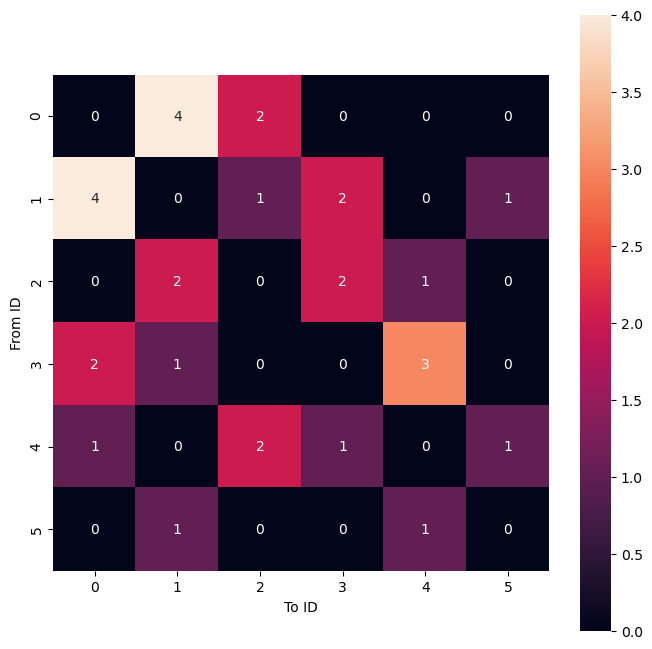

In [3]:
plt.figure(figsize=(8, 8))

# print(directions_num)
sns.heatmap(
    directions_num, # データ
    annot=True,
    square=True, # ヒートマップを正方形で表示
)
plt.ylabel("From ID")
plt.xlabel("To ID")
plt.show()

[(0.0, 1.0, 4.0) (0.0, 2.0, 2.0) (1.0, 0.0, 4.0) (1.0, 2.0, 1.0)
 (1.0, 3.0, 2.0) (1.0, 5.0, 1.0) (2.0, 1.0, 2.0) (2.0, 3.0, 2.0)
 (2.0, 4.0, 1.0) (3.0, 0.0, 2.0) (3.0, 1.0, 1.0) (3.0, 4.0, 3.0)
 (4.0, 0.0, 1.0) (4.0, 2.0, 2.0) (4.0, 3.0, 1.0) (4.0, 5.0, 1.0)
 (5.0, 1.0, 1.0) (5.0, 4.0, 1.0)]


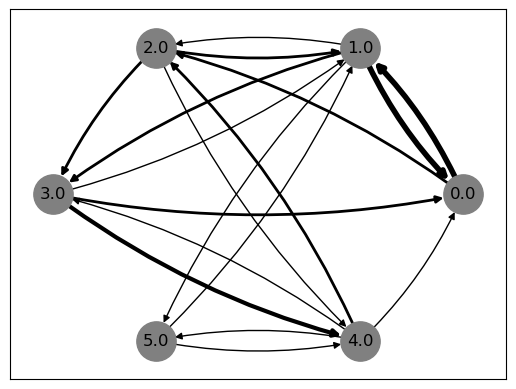

In [11]:
df_directions_num = pd.DataFrame(directions_num)
df_directions_num = df_directions_num.mask(df_directions_num == 0)

# エッジリストを生成
edge_lists = df_directions_num.stack().reset_index().apply(tuple, axis=1).values
print(edge_lists)
# G = nx.Graph()
G = nx.MultiDiGraph()
G.add_weighted_edges_from(edge_lists)
pos = nx.circular_layout(G)
# weight に応じてラインの太さを調整
line_width = [d['weight'] for u,v,d in G.edges(data=True)]
nx.draw_networkx(G, pos=pos, node_size=800, node_color='gray', width=line_width, connectionstyle="arc3,rad=0.1")

plt.show()